# ___Imports___

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
from geopy.geocoders import Nominatim
import geopy as gp
from datetime import datetime
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


# ___Load Data___

In [122]:
# load data for nasa
data = pd.read_csv('../data/ALL_DATA.csv')
print(data.columns)


data.head()
np.shape(data)
  

Index(['id', 'class', 'mass', 'fall', 'year', 'lat', 'long', 'Elevation'], dtype='object')


(88705, 8)

# ___Scaling (10%)___

In [123]:
# *****************************
# HIGHLY IMPORTANT
# *****************************

# Sample data
print("Original Data Stats: \n")
print(data.describe())

print('\n--------\n')

print("New Sample Data Stats: \n")
# all_data['year'].fillna(0).astype(int)
# all_data['mass'].fillna(0).astype(int)


data = data.sample(frac=0.1)  # 10% sample set
print(data.describe())


Original Data Stats: 

                 id          mass          year           lat          long  \
count  88705.000000  8.870500e+04  88705.000000  88705.000000  88705.000000   
mean   37088.348053  1.327808e+04   1999.326928      2.815932     38.871848   
std    23580.335315  4.121868e+05     21.440582     50.503054     70.303823   
min        1.000000  0.000000e+00    301.000000    -87.366670   -174.833333   
25%    16281.000000  3.000000e+01   1998.000000    -38.630000      8.192500   
50%    34337.000000  1.200000e+04   2002.000000     23.000000     26.000000   
75%    56576.000000  1.327808e+04   2008.000000     45.968889     58.407850   
max    80694.000000  6.000000e+07   2501.000000     82.569167    354.473330   

          Elevation  
count  88705.000000  
mean     333.548386  
std      375.385323  
min      -11.000000  
25%      100.000000  
50%      333.548386  
75%      333.548386  
max     9999.000000  

--------

New Sample Data Stats: 

                 id          ma

In [124]:
all_data = pd.DataFrame(data=data)
print(all_data)
# all_data.columns = data.feature_names
# data['year'] = data.target

# print(data.head())
all_data.columns

            id class          mass   fall    year        lat        long  \
85569  23492.0   NaN  13278.078549    NaN  2011.0  40.760000   14.450000   
73568  51055.0   NaN  13278.078549    NaN  2003.0  28.365028  -80.857583   
81107  67947.0   NaN  13278.078549    NaN  2012.0  53.250000  108.733333   
31789  18600.0    L6     63.000000  Found  1991.0 -85.680790  -68.736960   
30311  54951.0    H5   1692.000000  Found  2011.0   0.000000    0.000000   
...        ...   ...           ...    ...     ...        ...         ...   
49080  63392.0   NaN  13278.078549    NaN  2009.0  44.158333   19.686389   
31690  18501.0    H5      5.400000  Found  1991.0 -85.677800  -68.661700   
16121  11634.0    L5   1332.000000  Found  1995.0  28.651000   13.468330   
42730  29481.0    H5     31.380000  Found  1984.0 -71.500000   35.666670   
16053  11566.0    H5    396.000000  Found  1995.0  28.666670   12.933330   

         Elevation  
85569     0.000000  
73568     0.000000  
81107   475.000000  
317

Index(['id', 'class', 'mass', 'fall', 'year', 'lat', 'long', 'Elevation'], dtype='object')

# ___One Hot Encoding___

In [125]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# ### Categorical data to be converted to numeric data
class_data = list(all_data['class'])
fall_data = list(all_data['fall'])

### integer mapping using LabelEncoder
le = LabelEncoder()
class_encoded = le.fit_transform(class_data)
fall_encoded = le.fit_transform(fall_data)
class_encoded = class_encoded.reshape(len(class_encoded), 1)
fall_encoded = fall_encoded.reshape(len(fall_encoded), 1)

### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_class = onehot_encoder.fit_transform(class_encoded)
onehot_encoded_fall = onehot_encoder.fit_transform(fall_encoded)

print(onehot_encoded_class)
all_data['class'] = onehot_encoded_class
print(all_data['class'])

print('\n\n\n')
print(onehot_encoded_fall)
all_data['fall'] = onehot_encoded_fall
print(all_data['fall'])

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
85569    0.0
73568    0.0
81107    0.0
31789    0.0
30311    0.0
        ... 
49080    0.0
31690    0.0
16121    0.0
42730    0.0
16053    0.0
Name: class, Length: 8870, dtype: float64




[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
85569    0.0
73568    0.0
81107    0.0
31789    0.0
30311    0.0
        ... 
49080    0.0
31690    0.0
16121    0.0
42730    0.0
16053    0.0
Name: fall, Length: 8870, dtype: float64


In [126]:
print(all_data.head)

<bound method NDFrame.head of             id  class          mass  fall    year        lat        long  \
85569  23492.0    0.0  13278.078549   0.0  2011.0  40.760000   14.450000   
73568  51055.0    0.0  13278.078549   0.0  2003.0  28.365028  -80.857583   
81107  67947.0    0.0  13278.078549   0.0  2012.0  53.250000  108.733333   
31789  18600.0    0.0     63.000000   0.0  1991.0 -85.680790  -68.736960   
30311  54951.0    0.0   1692.000000   0.0  2011.0   0.000000    0.000000   
...        ...    ...           ...   ...     ...        ...         ...   
49080  63392.0    0.0  13278.078549   0.0  2009.0  44.158333   19.686389   
31690  18501.0    0.0      5.400000   0.0  1991.0 -85.677800  -68.661700   
16121  11634.0    0.0   1332.000000   0.0  1995.0  28.651000   13.468330   
42730  29481.0    0.0     31.380000   0.0  1984.0 -71.500000   35.666670   
16053  11566.0    0.0    396.000000   0.0  1995.0  28.666670   12.933330   

         Elevation  
85569     0.000000  
73568     0.000

# ___Bar Plot of year counts___

<BarContainer object of 165 artists>

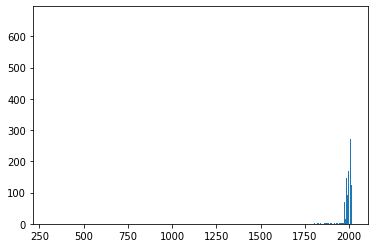

In [127]:
count = all_data.year.value_counts()
plt.bar(count.keys(), count.values)

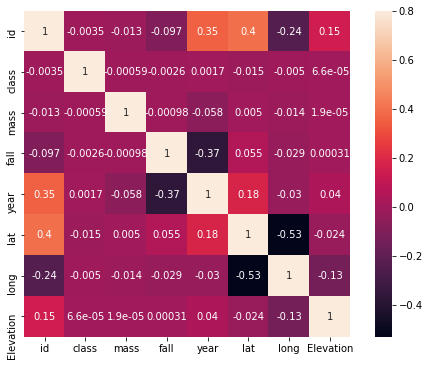

In [128]:
# heat map of correlation of features
correlation_matrix = all_data.corr()
fig = plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, annot=True)
plt.show()

In [129]:
#Correlation with output variable
cor_target = abs(correlation_matrix['year'])
print(cor_target)
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

id           0.353699
class        0.001691
mass         0.057512
fall         0.365896
year         1.000000
lat          0.177617
long         0.029744
Elevation    0.040358
Name: year, dtype: float64


id      0.353699
fall    0.365896
year    1.000000
Name: year, dtype: float64

# ___Build Model___

In [130]:
def data_model(data, target):  #x,y
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
    pipeline = make_pipeline(LinearRegression())
    model = pipeline.fit(X_train, y_train)
    
    return (X_test, y_test, model)

# ___Test Model___

In [131]:
print("Value distribution of features: ")
print(list(all_data.iloc[0]))

min_max = MinMaxScaler()
data_min_max = min_max.fit_transform(all_data)
print('\n')
print("Value distribution after min max: ")
print(list(data_min_max[0]))

std = StandardScaler()
data_std = std.fit_transform(all_data)
print('\n')
print("Value distribution after std: ")
print(list(data_std[0]))

Value distribution of features: 
[23492.0, 0.0, 13278.078548601514, 0.0, 2011.0, 40.76, 14.45, 0.0]


Value distribution after min max: 
[0.2909895504071994, 0.0, 0.00022130130914335856, 0.0, 0.9947643979057591, 0.7534873159982858, 0.35760617888558466, 0.00029994001199760045]


Value distribution after std: 
[-0.5668163037089086, -0.023749016662636544, -0.006613906359614589, -0.11154148157358809, 0.4421035091459633, 0.7540807100676152, -0.3444933689054493, -0.8938947796533716]


# ___Model Evaluation___

In [132]:
#Data Variable
x = all_data[all_data.columns[0]]
#Target Variable
y = all_data[all_data.columns[1]]

In [146]:
print("Base:")
X_test, y_test, model = data_model(all_data, y)
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))
print('\n')


print("MinMax:")
X_test, y_test, model = data_model(data_min_max, y)
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))
print("Confusion Matrix: {}".format(confusion_matrix(y_test, prediction.round())))
print("Accuracy: {}".format(accuracy_score(y_test, prediction.round(), normalize=False)))
print("Recall Score: {}".format(recall_score(y_test, prediction.round(), average=None)))
print("Precision Score: {}".format(precision_score(y_test, prediction.round(), average=None)))

print('\n')



print("Std:")
X_test, y_test, model = data_model(data_std, y)
prediction = model.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, prediction)))
print("R Squared: {}".format(r2_score(y_test, prediction)))
print("Confusion Matrix: {}".format(confusion_matrix(y_test, prediction.round())))
print("Accuracy: {}".format(accuracy_score(y_test, prediction.round(), normalize=False)))
print("Recall Score: {}".format(recall_score(y_test, prediction.round(), average=None)))
print("Precision Score: {}".format(precision_score(y_test, prediction.round(), average=None)))


Base:
MSE: 3.3628737165002427e-21
R Squared: 1.0


MinMax:
MSE: 3.874072748502531e-33
R Squared: 1.0
Confusion Matrix: [[2216    0]
 [   0    2]]
Accuracy: 2218
Recall Score: [1. 1.]
Precision Score: [1. 1.]


Std:
MSE: 3.943562439595265e-34
R Squared: 1.0
Confusion Matrix: [[2216    0]
 [   0    2]]
Accuracy: 2218
Recall Score: [1. 1.]
Precision Score: [1. 1.]
